In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [3]:
df = pd.read_csv('/Users/lenguyenthai/Data_Project/loan_pay_back/data/raw/train.csv')

In [4]:
df

,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade,loan_paid_back
0,0,29367.99,0.084,736,2528.42,13.67,Female,Single,High School,Self-employed,Other,C3,1.0
1,1,22108.02,0.166,636,4593.10,12.92,Male,Married,Master's,Employed,Debt consolidation,D3,0.0
2,2,49566.20,0.097,694,17005.15,9.76,Male,Single,High School,Employed,Debt consolidation,C5,1.0
3,3,46858.25,0.065,533,4682.48,16.10,Female,Single,High School,Employed,Debt consolidation,F1,1.0
4,4,25496.70,0.053,665,12184.43,10.21,Male,Married,High School,Employed,Other,D1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
593989,593989,23004.26,0.152,703,20958.37,10.92,Female,Single,High School,Employed,Business,C3,1.0
593990,593990,35289.43,0.105,559,3257.24,14.62,Male,Single,Bachelor's,Employed,Debt consolidation,F5,1.0
593991,593991,47112.64,0.072,675,929.27,14.13,Female,Married,Bachelor's,Employed,Debt consolidation,C1,1.0
593992,593992,76748.44,0.067,740,16290.40,9.87,Male,Single,Bachelor's,Employed,Debt consolidation,B2,1.0


In [7]:
df = df.drop(columns=['id'])

In [8]:
df_num = df.select_dtypes(include=['int64', 'float64'])
df_cat = df.select_dtypes(include=['object'])

/var/folders/rw/1m541pvj2b97sd49j_ww71zc0000gn/T/ipykernel_1158/2286384820.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=targe, y=col, data=df_num, palette='Set2')


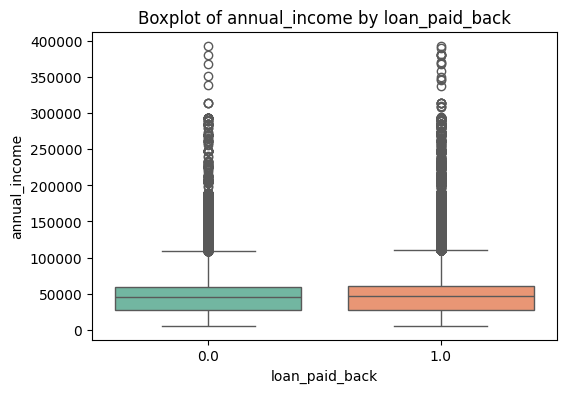

/var/folders/rw/1m541pvj2b97sd49j_ww71zc0000gn/T/ipykernel_1158/2286384820.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=targe, y=col, data=df_num, palette='Set2')


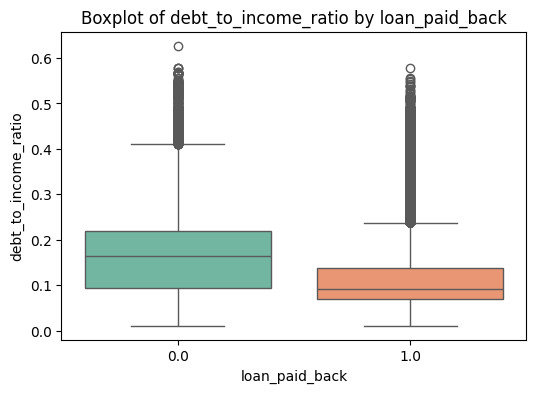

/var/folders/rw/1m541pvj2b97sd49j_ww71zc0000gn/T/ipykernel_1158/2286384820.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=targe, y=col, data=df_num, palette='Set2')


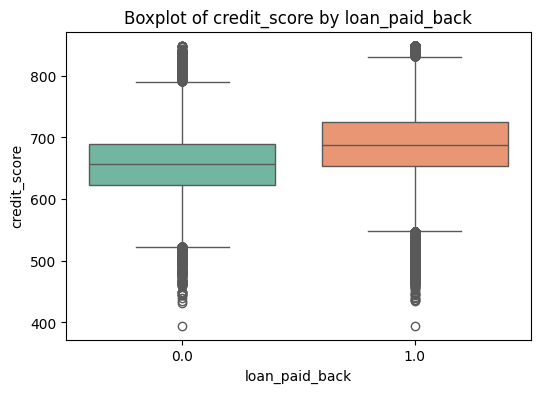

/var/folders/rw/1m541pvj2b97sd49j_ww71zc0000gn/T/ipykernel_1158/2286384820.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=targe, y=col, data=df_num, palette='Set2')


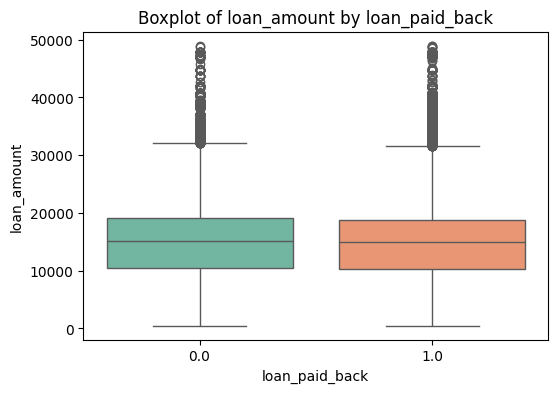

/var/folders/rw/1m541pvj2b97sd49j_ww71zc0000gn/T/ipykernel_1158/2286384820.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=targe, y=col, data=df_num, palette='Set2')


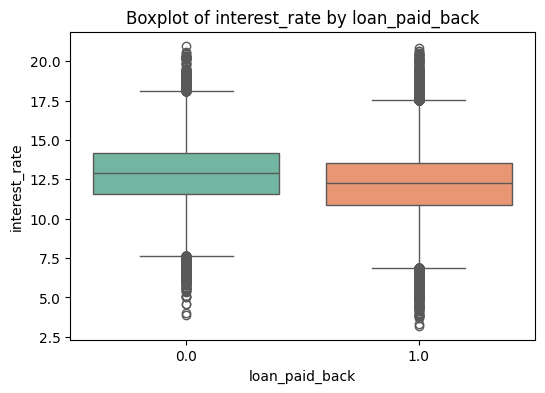

/var/folders/rw/1m541pvj2b97sd49j_ww71zc0000gn/T/ipykernel_1158/2286384820.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=targe, y=col, data=df_num, palette='Set2')


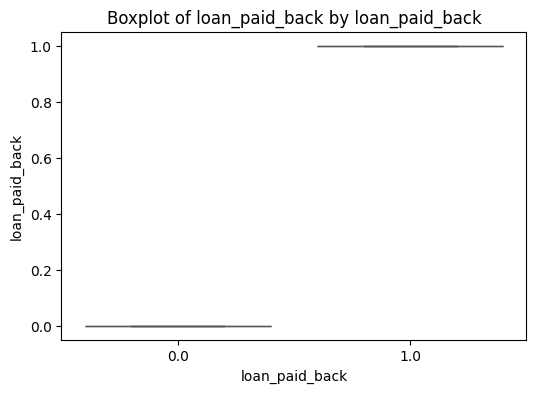

In [12]:
cols = df_num.columns.tolist()
targe = 'loan_paid_back'

for col in cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=targe, y=col, data=df_num, palette='Set2')
    plt.title(f'Boxplot of {col} by {targe}')
    plt.show()

In [ ]:
# For each categorical column, show only the percentage of loans paid back (where target == 1)
from IPython.display import display

target = 'loan_paid_back'

cat_cols = [c for c in df_cat.columns if c != target]
if len(cat_cols) == 0:
    print('No categorical columns found to compute percentages.')
else:
    for col in cat_cols:
        # compute mean of target per category -> proportion paid back
        pct = df.groupby(col)[target].mean().fillna(0) * 100
        pct_df = pct.sort_values(ascending=False).to_frame(name='pct_paid_back')
        pct_df['pct_paid_back'] = pct_df['pct_paid_back'].round(2)
        print(f"\nPercent paid back by {col} (values are percent of loans with {target}==1)")
        display(pct_df)


Percent paid back by gender (values are percent of loans with loan_paid_back==1)


,pct_paid_back
gender,
Female,80.17
Male,79.58
Other,79.53



Percent paid back by marital_status (values are percent of loans with loan_paid_back==1)


,pct_paid_back
marital_status,
Married,79.91
Single,79.89
Divorced,79.66
Widowed,78.98



Percent paid back by education_level (values are percent of loans with loan_paid_back==1)


,pct_paid_back
education_level,
PhD,83.01
High School,80.97
Other,80.28
Master's,80.23
Bachelor's,78.89



Percent paid back by employment_status (values are percent of loans with loan_paid_back==1)


,pct_paid_back
employment_status,
Retired,99.72
Self-employed,89.85
Employed,89.41
Student,26.35
Unemployed,7.76



Percent paid back by loan_purpose (values are percent of loans with loan_paid_back==1)


,pct_paid_back
loan_purpose,
Home,82.32
Business,81.31
Other,80.24
Car,80.06
Debt consolidation,79.69
Vacation,79.61
Medical,77.81
Education,77.71



Percent paid back by grade_subgrade (values are percent of loans with loan_paid_back==1)


,pct_paid_back
grade_subgrade,
A4,95.71
A3,95.55
A2,95.29
A1,95.25
A5,94.50
B3,94.00
B2,93.74
B5,93.42
B4,93.18
